In [18]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/IQ-RAM-SIRSK/main/Tinnitus_ALR_features_106.csv")

In [19]:
dataset.head()

,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,...,gap_auc_n1p2n2_by_total,gap_auc_p2n2p3_by_total,nogap_auc_total,nogap_auc_total_abs,nogap_auc_n0p1n1_by_total,nogap_auc_p1n1p2_by_total,nogap_auc_n1p2n2_by_total,nogap_auc_p2n2p3_by_total,fft_gap_total_auc,fft_nogap_total_auc
0,Healthy,Test,20ms,101,147,214,263,366,105,149,...,20.751953,0.038292,33.935547,15.285080,10.327331,1.672325,86.663602,1.333714,0.940225,0.074033
1,Healthy,Test,20ms,132,155,217,301,383,131,175,...,21.972656,0.118686,35.644531,15.548298,10.137840,3.010325,79.939031,1.775618,0.665121,0.227634
2,Healthy,Test,20ms,107,160,221,305,396,128,192,...,18.310547,0.048787,41.015625,13.078348,8.643543,2.167986,48.851014,1.769573,0.618907,0.093239
3,Healthy,Test,20ms,77,200,233,268,379,166,120,...,16.357422,0.062302,39.306641,7.087050,5.196947,3.325309,47.181061,0.831445,0.453683,0.119996
4,Healthy,Test,20ms,153,128,224,264,337,147,176,...,16.845703,0.100706,32.958984,15.198039,11.166206,2.334388,45.697755,1.665048,0.845292,0.192855


In [20]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:

from sklearn.ensemble import AdaBoostClassifier

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[33  6]
 [10 17]]
              precision    recall  f1-score   support

     Healthy       0.77      0.85      0.80        39
    Tinnitus       0.74      0.63      0.68        27

    accuracy                           0.76        66
   macro avg       0.75      0.74      0.74        66
weighted avg       0.76      0.76      0.75        66

Accurecy:  0.7575757575757576


1/150 round completed......................... Accurecy: 0.7121212121212122
2/150 round completed......................... Accurecy: 0.7424242424242424
3/150 round completed......................... Accurecy: 0.7424242424242424
4/150 round completed......................... Accurecy: 0.7121212121212122
5/150 round completed......................... Accurecy: 0.7121212121212122
6/150 round completed......................... Accurecy: 0.6818181818181818
7/150 round completed......................... Accurecy: 0.6818181818181818
8/150 round completed......................... Accurecy: 0.696969696969697
9/150 round completed......................... Accurecy: 0.7272727272727273
10/150 round completed......................... Accurecy: 0.7121212121212122
11/150 round completed......................... Accurecy: 0.7121212121212122
12/150 round completed......................... Accurecy: 0.696969696969697
13/150 round completed......................... Accurecy: 0.7424242424242424
14/150 rou

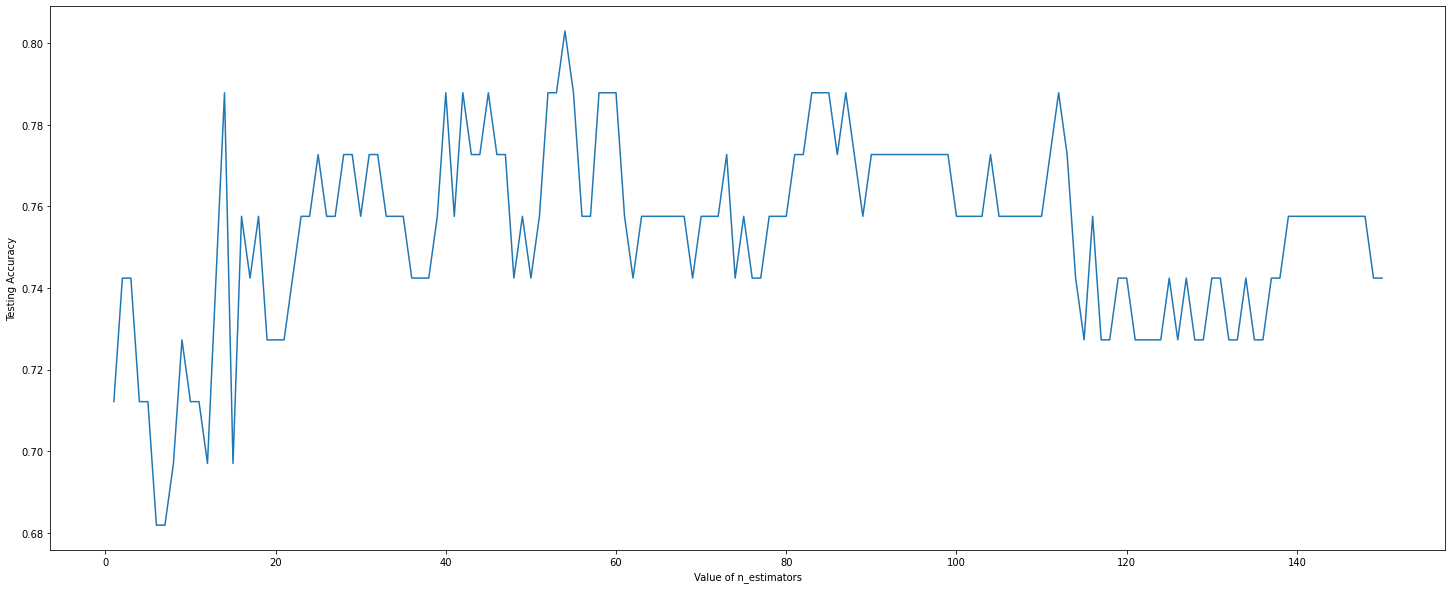

In [24]:
from sklearn.ensemble import AdaBoostClassifier
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [26]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[35  4]
 [ 9 18]]
              precision    recall  f1-score   support

     Healthy       0.80      0.90      0.84        39
    Tinnitus       0.82      0.67      0.73        27

    accuracy                           0.80        66
   macro avg       0.81      0.78      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303
